In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
## read csv
df_train = pd.read_csv("../input/spaceship-titanic/train.csv")
df_test = pd.read_csv("../input/spaceship-titanic/test.csv")
print("train data shape : " ,df_train.shape)
print("test data shape : " ,df_test.shape)
df_train

train data shape :  (8693, 14)
test data shape :  (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
## divide features and target (x , y)

df_train_features = df_train.iloc[: , : -1]
df_train_target = df_train.iloc[:,-1]
df_test_features = df_test

In [6]:
df_test_features

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [7]:
df_train_features.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent


In [8]:
## check null and data
print(df_train_features.isna().sum())
df_train_features.describe(include = 'all')

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN


In [9]:
##As Cabin has 3 data parts ../../.. -> divided them and add to the column
def tear_Cabin (df_features) : 
    result = df_features['Cabin'].str.split('/')
    df_features['Cabin_1'] = result.str[0]
    df_features['Cabin_2'] = result.str[1]
    df_features['Cabin_3'] = result.str[2]
    df_features.drop(['Cabin'], axis = 1, inplace = True)
    return df_features

df_train_features = tear_Cabin (df_train_features)
df_test_features = tear_Cabin (df_test_features)

In [10]:
##As Cabin_2 is numeric data, transtype to float and check the data 
df_train_features = df_train_features.astype({'Cabin_2' : 'float64'})
df_test_features = df_test_features.astype({'Cabin_2' : 'float64'})
print(df_train_features['Cabin_2'].describe())


count    8494.000000
mean      600.367671
std       511.867226
min         0.000000
25%       167.250000
50%       427.000000
75%       999.000000
max      1894.000000
Name: Cabin_2, dtype: float64


In [11]:
## Cabin_2 has variation, I will categorize it by binding 100 of them 

df_train_features['Cabin_2_cate'] = df_train_features['Cabin_2'] // 100
df_train_features.drop(['Cabin_2'], axis = 1, inplace = True)
df_train_features['Cabin_2_cate'] = df_train_features['Cabin_2_cate'].astype(str)

df_test_features['Cabin_2_cate'] = df_test_features['Cabin_2'] // 100
df_test_features.drop(['Cabin_2'], axis = 1, inplace = True)
df_test_features['Cabin_2_cate'] = df_test_features['Cabin_2_cate'].astype(str)

In [12]:
## 'PassengerId', 'Name' is not valid data to know transported

df_train_features.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
df_test_features.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [13]:
## check each columns are numeric or categorical
FLOAT_FEATURES_NAME = []
CATEGORICAL_FEATURES_NAME = []
for dtype in enumerate(df_train_features.dtypes):
    print(dtype)
    if dtype[1] == 'float64':
        FLOAT_FEATURES_NAME.append(df_train_features.dtypes.index[dtype[0]])
    elif dtype[1] == 'object':
        CATEGORICAL_FEATURES_NAME.append(df_train_features.dtypes.index[dtype[0]])
print("numeric features : ", FLOAT_FEATURES_NAME)
print("categorical features : ", CATEGORICAL_FEATURES_NAME)

(0, dtype('O'))
(1, dtype('O'))
(2, dtype('O'))
(3, dtype('float64'))
(4, dtype('O'))
(5, dtype('float64'))
(6, dtype('float64'))
(7, dtype('float64'))
(8, dtype('float64'))
(9, dtype('float64'))
(10, dtype('O'))
(11, dtype('O'))
(12, dtype('O'))
numeric features :  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical features :  ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_1', 'Cabin_3', 'Cabin_2_cate']


<AxesSubplot:xlabel='count', ylabel='Transported'>

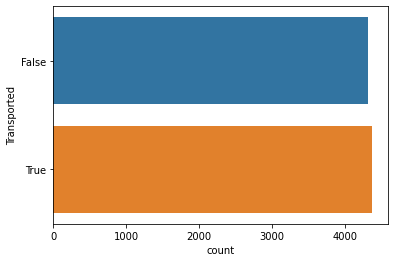

In [14]:
## check trasnported
sns.countplot(y = df_train_target)    

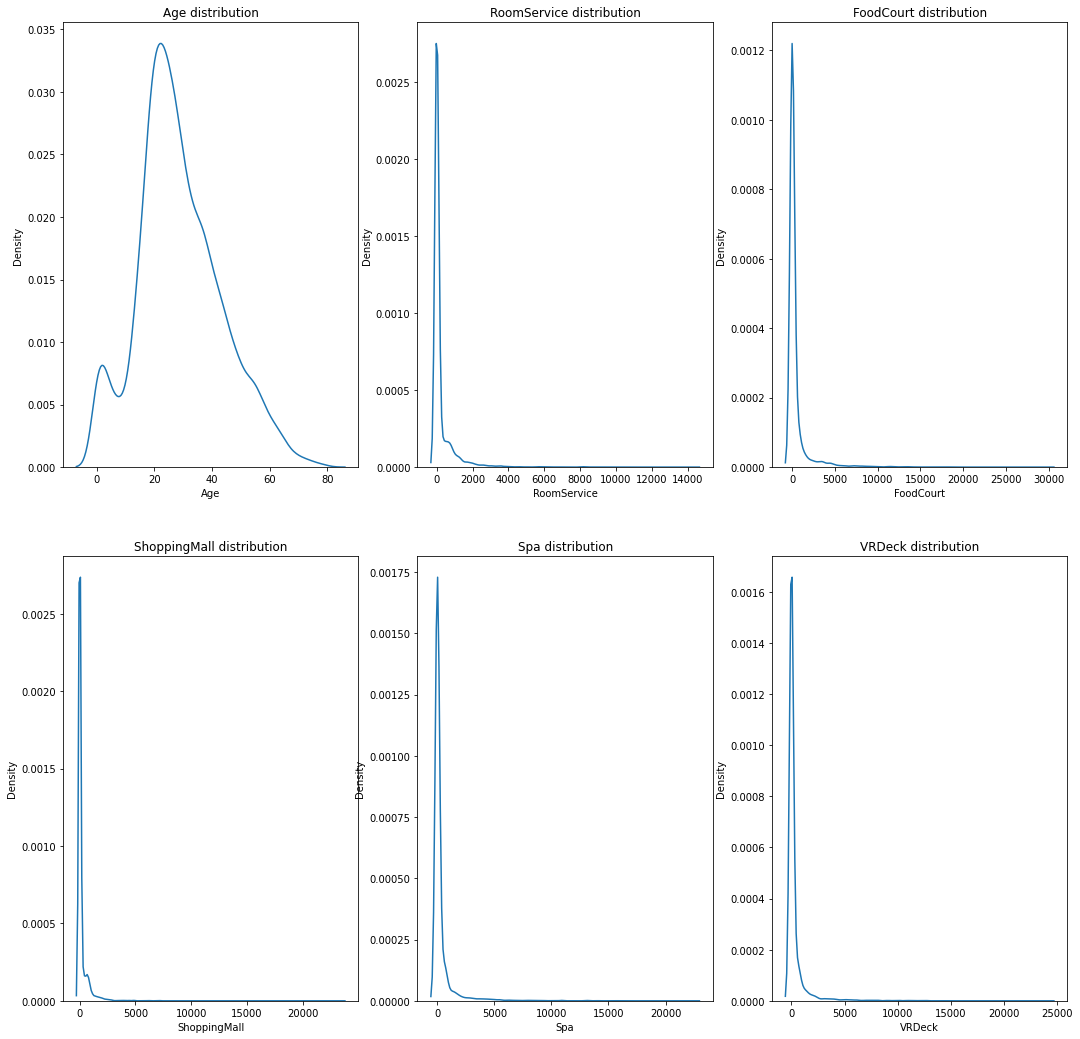

In [15]:
fig, ax = plt.subplots(2,3, figsize=(18, 18))
for i, feature in enumerate( FLOAT_FEATURES_NAME):
    sns.kdeplot(data = df_train_features[feature], ax = ax[math.floor(i/3), i%3]).set_title(f'{feature} distribution')
fig.show()

##https://www.kaggle.com/usharengaraju/tensorflow-spaceship-neuraldecisionforests

In [22]:
 NEED_TO_LOGGED_FEATURES_NAME = FLOAT_FEATURES_NAME[1:]
  

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [23]:
 NEED_TO_LOGGED_FEATURES_NAME 

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

<AxesSubplot:>

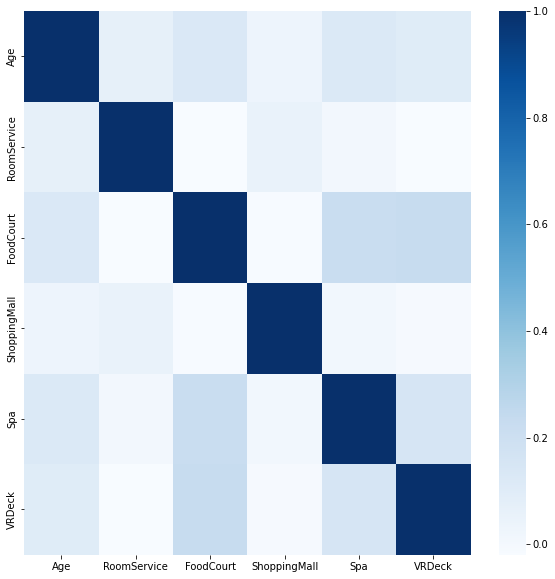

In [24]:
### get correlation data
plt.figure(figsize = (10,10))
corr = df_train_features.corr()
sns.heatmap(corr, cmap = 'Blues')

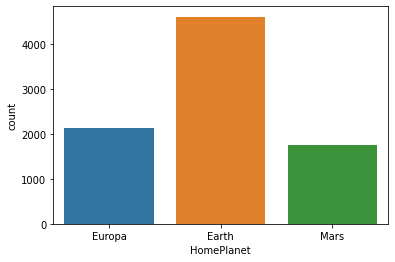

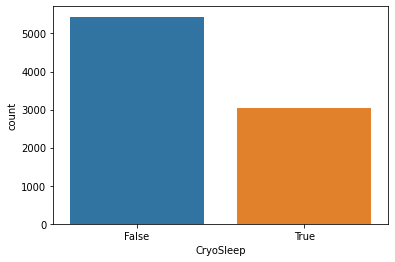

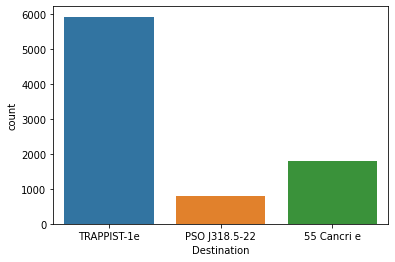

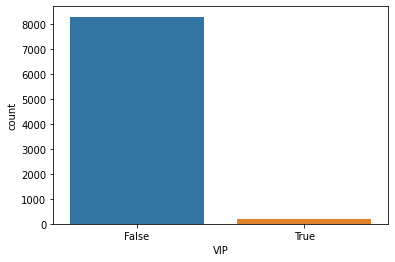

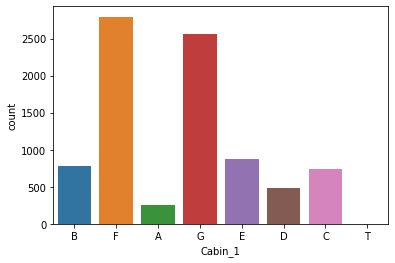

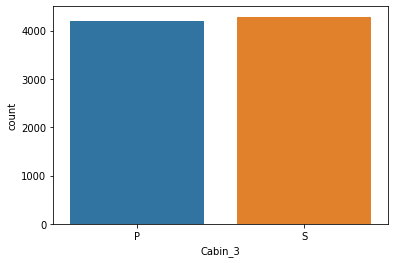

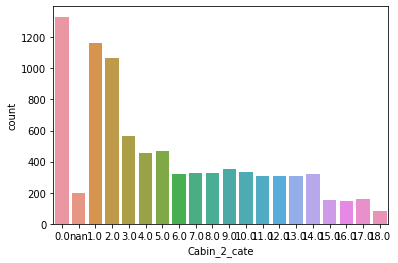

In [25]:
## get image of categorical data
for i,feature in enumerate(CATEGORICAL_FEATURES_NAME[:]):
   ## plt.figure(figsize = (7,7))
    ax = sns.countplot(x = feature, data = df_train_features)
    plt.show()

In [26]:
print(df_train_features.isna().sum())

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Cabin_1         199
Cabin_3         199
Cabin_2_cate      0
dtype: int64


In [27]:
df_train_features['Age'].fillna(df_train_features['Age'].mean(), inplace = True)
df_train_features['RoomService'].fillna(df_train_features['RoomService'].median(), inplace = True)
df_train_features['FoodCourt'].fillna(df_train_features['FoodCourt'].median(), inplace = True)
df_train_features['ShoppingMall'].fillna(df_train_features['ShoppingMall'].median(), inplace = True)
df_train_features['Spa'].fillna(df_train_features['Spa'].median(), inplace = True)
df_train_features['VRDeck'].fillna(df_train_features['VRDeck'].median(), inplace = True)

df_test_features['Age'].fillna(df_test_features['Age'].mean(), inplace = True)
df_test_features['RoomService'].fillna(df_test_features['RoomService'].median(), inplace = True)
df_test_features['FoodCourt'].fillna(df_test_features['FoodCourt'].median(), inplace = True)
df_test_features['ShoppingMall'].fillna(df_test_features['ShoppingMall'].median(), inplace = True)
df_test_features['Spa'].fillna(df_test_features['Spa'].median(), inplace = True)
df_test_features['VRDeck'].fillna(df_test_features['VRDeck'].median(), inplace = True)

In [28]:
CATEGORICAL_FEATURES_NAME

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin_1',
 'Cabin_3',
 'Cabin_2_cate']

In [29]:
df_train_features['HomePlanet'].fillna('Earth', inplace = True)
df_train_features['CryoSleep'].fillna('False', inplace = True)
df_train_features['Destination'].fillna('TRAPPIST-1e', inplace = True)
df_train_features['VIP'].fillna('False', inplace = True)
df_train_features['Cabin_1'].fillna('F', inplace = True)
df_train_features['Cabin_3'].fillna('P', inplace = True)
df_train_features['Cabin_2_cate'].fillna('0', inplace = True)

df_test_features['HomePlanet'].fillna('Earth', inplace = True)
df_test_features['CryoSleep'].fillna('False', inplace = True)
df_test_features['Destination'].fillna('TRAPPIST-1e', inplace = True)
df_test_features['VIP'].fillna('False', inplace = True)
df_test_features['Cabin_1'].fillna('F', inplace = True)
df_test_features['Cabin_3'].fillna('P', inplace = True)
df_test_features['Cabin_2_cate'].fillna('0', inplace = True)

In [30]:
print("train data's NA\n",df_train_features.isna().sum())

train data's NA
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_1         0
Cabin_3         0
Cabin_2_cate    0
dtype: int64


In [31]:
print("test data's NA\n",df_test_features.isna().sum())

test data's NA
 HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_1         0
Cabin_3         0
Cabin_2_cate    0
dtype: int64


In [66]:
def get_dummy_and_log1 (df_features , CATEGORICAL_FEATURES_NAME, NEED_TO_LOGGED_FEATURES_NAME ):
    for features in CATEGORICAL_FEATURES_NAME:
        df_features[features] = df_features[features].astype(str)
    df_features_processed = pd.get_dummies(df_features ,CATEGORICAL_FEATURES_NAME)
    
    for features in NEED_TO_LOGGED_FEATURES_NAME : 
           df_features_processed[features] = np.log1p( df_features_processed[features])
    return df_features_processed


df_train_target.replace([True, False] , [1 , 0], inplace = True)

df_train_features_processed = get_dummy_and_log1(df_train_features, CATEGORICAL_FEATURES_NAME, NEED_TO_LOGGED_FEATURES_NAME)
df_test_features_processed = get_dummy_and_log1(df_test_features, CATEGORICAL_FEATURES_NAME, NEED_TO_LOGGED_FEATURES_NAME)

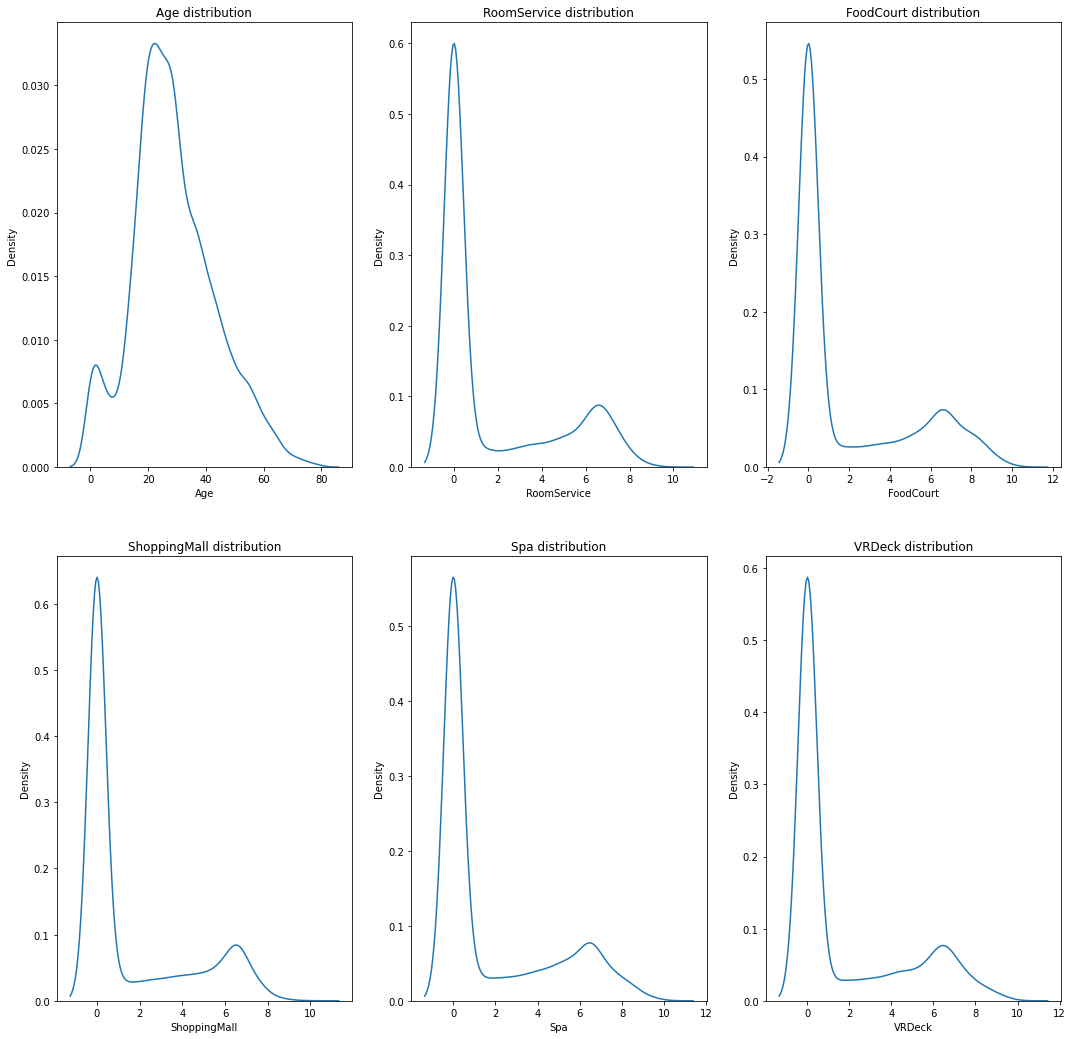

In [35]:
fig, ax = plt.subplots(2,3, figsize=(18, 18))
for i, feature in enumerate( FLOAT_FEATURES_NAME):
    sns.kdeplot(data = df_train_features_processed[feature], ax = ax[math.floor(i/3), i%3]).set_title(f'{feature} distribution')
fig.show()

In [36]:
print(df_train_features_processed.columns)
print(len(df_train_features_processed.columns))
print(len(df_test_features_processed.columns))

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C', 'Cabin_1_D',
       'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_T', 'Cabin_3_P',
       'Cabin_3_S', 'Cabin_2_cate_0.0', 'Cabin_2_cate_1.0',
       'Cabin_2_cate_10.0', 'Cabin_2_cate_11.0', 'Cabin_2_cate_12.0',
       'Cabin_2_cate_13.0', 'Cabin_2_cate_14.0', 'Cabin_2_cate_15.0',
       'Cabin_2_cate_16.0', 'Cabin_2_cate_17.0', 'Cabin_2_cate_18.0',
       'Cabin_2_cate_2.0', 'Cabin_2_cate_3.0', 'Cabin_2_cate_4.0',
       'Cabin_2_cate_5.0', 'Cabin_2_cate_6.0', 'Cabin_2_cate_7.0',
       'Cabin_2_cate_8.0', 'Cabin_2_cate_9.0', 'Cabin_2_cate_nan'],
      dtype='object')
46
46


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train,  y_valid=train_test_split(df_train_features_processed,df_train_target\
                                                  , test_size=0.2, random_state=42 )



In [70]:
y_train[2]

'0'

In [78]:
rf_clf = RandomForestClassifier(random_state=42 , n_jobs = -1)

rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score( y_valid , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8091


In [81]:
params = {
    'n_estimators':[100 , 200 , 500],
    'max_depth' : [14 , 16 ,50], 
    'min_samples_leaf' : [6,8, 10,1],
    'min_samples_split' : [2, 4, 6]
}


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(df_train_features_processed , df_train_target)
rf_grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, scoring = 'accuracy', n_jobs=-1 )
rf_grid_cv.fit(X_train , y_train)
print('Best Parameters : ', rf_grid_cv.best_params_ )
print('Best Accuracy : ', rf_grid_cv.best_score_)
# print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(df_test_target, rf_pred)))
# print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_Valid, rf_pred)))

KeyboardInterrupt: 

In [95]:
from xgboost import XGBClassifier

param = {'n_estimators':  25, 
              'learning_rate': 0.15,
              'eval_metric': ['mlogloss'],
         'objective':'binary:logistic'
        }

xgb = XGBClassifier()
xgb.set_params(**param)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_valid)
accuracy = accuracy_score( y_valid ,y_pred_xgb)
print(accuracy)

0.7993099482461185


In [98]:
params_xgboost = {'max_depth':[3, 5 ,10 , 20],
                'n_estimators': [10, 25, 50, 75, 100],
                  'learning_rate': [0.2, 0.15, 0.1, 0.05],
                  'eval_metric': ['mlogloss']
                
                }
grid = GridSearchCV(XGBClassifier(), param_grid=params_xgboost, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
best_params = grid.best_params_
print('Best score of cross validation: {:.2f}'.format(grid.best_score_))
print('Best parameters:', best_params)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best score of cross validation: 0.81
Best parameters: {'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75}


In [100]:
xgb = XGBClassifier()
xgb.set_params(**best_params)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_valid)
accuracy = accuracy_score( y_valid ,y_pred_xgb)
print(accuracy)

0.8004600345025877


In [101]:
y_pred_xgb = xgb.predict(df_test_features_processed)

In [102]:
subs = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
subs

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [103]:
subs['Transported'] = y_pred_xgb
subs.to_csv('submission2.csv', index = False)
subs.head(10)

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
5,0027_01,0
6,0029_01,1
7,0032_01,1
8,0032_02,1
9,0033_01,1


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_Valid, y_train, y_Valid = \
#     train_test_split(df_train_features_dummies, df_train_target, test_size=0.2, random_state=42, stratify=df_train_target)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
# dt_clf = DecisionTreeClassifier(random_state=42)
# rf_clf = RandomForestClassifier(random_state=42)
# lr_clf = LogisticRegression()

# # DecisionTreeClassifier 학습/예측/평가
# dt_clf.fit(X_train, y_train)
# dt_pred = dt_clf.predict(X_Valid)
# print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score( y_Valid, dt_pred)))

# # RandomForestClassifier 학습/예측/평가
# rf_clf.fit(X_train , y_train)
# rf_pred = rf_clf.predict(X_Valid)
# print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_Valid, rf_pred)))

# # LogisticRegression 학습/예측/평가
# # lr_clf.fit(X_train , y_train)
# # lr_pred = lr_clf.predict(X_Valid)
# # print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_Valid, lr_pred)))
